In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar dataset
(ds_train, ds_test), ds_info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

# Función para redimensionar (para el modelo)
def format_image(image, label):
    image = tf.image.resize(image, (64, 64)) / 255.0
    return image, label

ds_train = ds_train.map(format_image).batch(32).shuffle(1000)
ds_test = ds_test.map(format_image).batch(32)

# 2. Clases desde el dataset
class_names = ds_info.features["label"].names
print("Clases detectadas:", class_names)

# 3. Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 4. Entrenar
history = model.fit(ds_train, validation_data=ds_test, epochs=100)


# 5. Probar con una imagen del dataset original (no redimensionada)
raw_test = tfds.load("tf_flowers", split="train[80%:]", as_supervised=True)  # dataset original


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.R0NRDC_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Clases detectadas: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.3147 - loss: 2.0121 - val_accuracy: 0.3379 - val_loss: 1.5467
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4142 - loss: 1.4095 - val_accuracy: 0.4223 - val_loss: 1.3716
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4638 - loss: 1.2765 - val_accuracy: 0.4441 - val_loss: 1.2951
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4918 - loss: 1.2183 - val_accuracy: 0.4632 - val_loss: 1.2697
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5305 - loss: 1.1365 - val_accuracy: 0.4809 - val_loss: 1.2335
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5711 - loss: 1.0762 - val_accuracy: 0.4469 - val_loss: 1.3517
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5636 - loss: 1.0671 - val_accuracy: 0.4782 - val_loss: 1.2372
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5861 - loss: 1.0255 - val_accuracy: 0.4809 - val_l

<Figure size 1200x500 with 0 Axes>

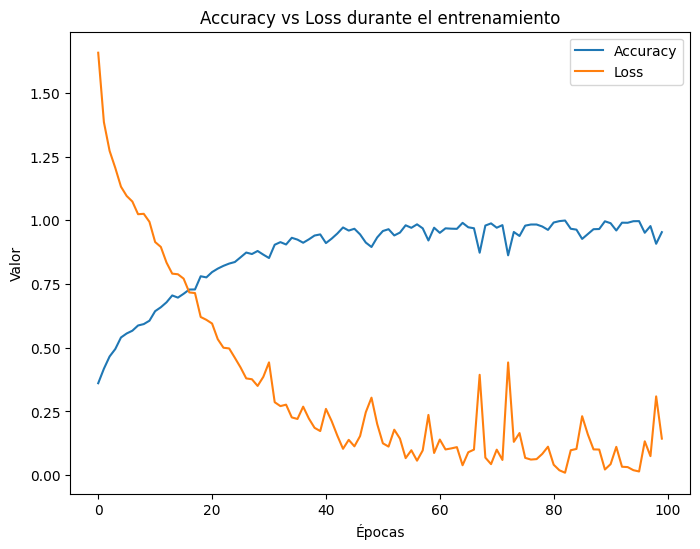

In [6]:
# 6. Graficar Accuracy y Loss
plt.figure(figsize=(12,5))

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Accuracy vs Loss durante el entrenamiento')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


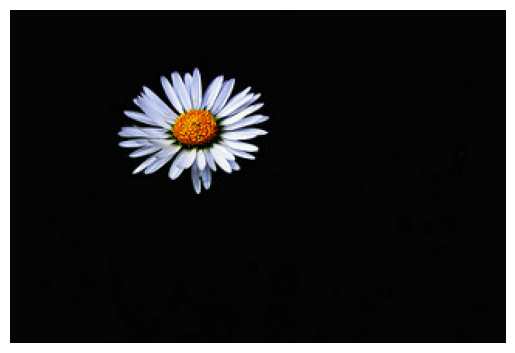


Clase real: daisy
Clase predicha: daisy


In [16]:

for i, (orig_img, orig_label) in enumerate(raw_test):
    if i == 4:
        # Copia procesada para el modelo
        img_proc = tf.image.resize(orig_img, (64, 64)) / 255.0
        img_proc = np.expand_dims(img_proc, axis=0)

        # Predicción
        prediction = model.predict(img_proc)[0]

        # Mostrar la imagen original (sin pixelar)
        plt.imshow(orig_img.numpy().astype("uint8"))
        plt.axis("off")
        plt.show()

        # Clase real y predicha
        real_class = class_names[orig_label.numpy()]
        predicted_class = class_names[np.argmax(prediction)]

        print("\nClase real:", real_class)
        print("Clase predicha:", predicted_class)



#Resultados
Tras el entrenamiento, el modelo alcanzó un porcentaje de precisión aceptable en la clasificación de las flores. No obstante, debido a que la red estaba compuesta únicamente por tres capas densas, su capacidad de representación era limitada frente a la complejidad de las imágenes a color.
Como consecuencia, el modelo necesitó aproximadamente 100 iteraciones para obtener resultados satisfactorios. Esto evidencia que, aunque fue capaz de aprender patrones